In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('used cars regression.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
#describe won't give us much insight now as most features are not numeric
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
#as New_Price is missing in most data, it would not be good to fill it and index column

df.drop(['New_Price'],axis=1,inplace=True)
df.drop('Unnamed: 0',axis = 1,inplace = True)

#dropping other missing data as they are not much and won't make a significant difference

df.dropna(inplace=True,axis=0)

#some data in Power is written as null bhp, so they won't be dropped by dropna

c = 0
for i in df['Power']:
    if i.startswith('null'):
        df = df.drop(index = c)
    c += 1

In [6]:
#coverting km/kg to kmpl

Mileage_KMpL = []

for i in df['Mileage']:
    if i.endswith('km/kg'):
        i, x = i.split(' ')
        i = round((float(i)/0.85),2)
        Mileage_KMpL.append(i)
        
    elif i.endswith('kmpl'):
        i, x = i.split(' ')
        i = round(float(i),2)
        Mileage_KMpL.append(i)
        
df['Mileage KM/L'] = Mileage_KMpL

In [7]:
#labelling and splitting some features to gain more insight

le = LabelEncoder()
df['Name'] = le.fit_transform(df['Name'])
df['Location'] = le.fit_transform(df['Location'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Owner_Type'] = le.fit_transform(df['Owner_Type'])

In [8]:
df['Engine CC'],xx = df['Engine'].str.split(' ').str
df['Power BHP'],xx = df['Power'].str.split(' ').str

#converting Engine CC and Power BHP to floats

df = df[df['Power BHP'] != 'null']

df['Engine CC'] = df['Engine CC'].astype(float)
df['Power BHP'] = df['Power BHP'].astype(float)

<ipython-input-8-ed6ce1d96dc2>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Engine CC'],xx = df['Engine'].str.split(' ').str
<ipython-input-8-ed6ce1d96dc2>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Power BHP'],xx = df['Power'].str.split(' ').str


In [9]:
#dropping unwanted features

df.drop(['Mileage','Engine','Power'],axis=1,inplace=True)

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage KM/L,Engine CC,Power BHP
0,1172,9,2010,72000,0,1,0,5.0,1.75,31.29,998.0,58.16
1,500,10,2015,41000,1,1,0,5.0,12.50,19.67,1582.0,126.20
2,474,2,2011,46000,3,1,0,5.0,4.50,18.20,1199.0,88.70
3,1036,2,2012,87000,1,1,0,7.0,6.00,20.77,1248.0,88.76
4,23,3,2013,40670,1,0,2,5.0,17.74,15.20,1968.0,140.80


In [10]:
df.describe()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage KM/L,Engine CC,Power BHP
count,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000
mean,895.721558,5.620606,2013.483983,57153.669957,1.898528,0.709784,0.369351,5.283983,9.607224,18.326784,1626.316017,113.346066
std,519.060387,2.951277,3.159710,37803.393154,1.007810,0.453901,0.807522,0.806351,11.250122,4.481315,601.915100,53.899036
min,0.000000,0.000000,1998.000000,171.000000,0.000000,0.000000,0.000000,2.000000,0.440000,0.000000,624.000000,34.200000
25%,454.000000,3.000000,2012.000000,33282.000000,1.000000,0.000000,0.000000,5.000000,3.535000,15.290000,1198.000000,75.470000
50%,903.000000,6.000000,2014.000000,52431.000000,1.000000,1.000000,0.000000,5.000000,5.750000,18.250000,1496.000000,97.700000
75%,1286.000000,8.000000,2016.000000,72016.000000,3.000000,1.000000,0.000000,5.000000,10.000000,21.100000,1991.000000,138.100000
max,1835.000000,10.000000,2019.000000,775000.000000,3.000000,1.000000,3.000000,10.000000,160.000000,39.460000,5998.000000,560.000000


C:\Users\Moham\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Density'>

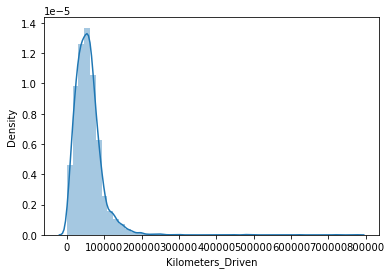

In [11]:
#describe shows that there is outliers in Kilometers_Driven

sns.distplot(df['Kilometers_Driven'])

In [12]:
# Removing outliers

df = df[df['Kilometers_Driven'] < 400000]

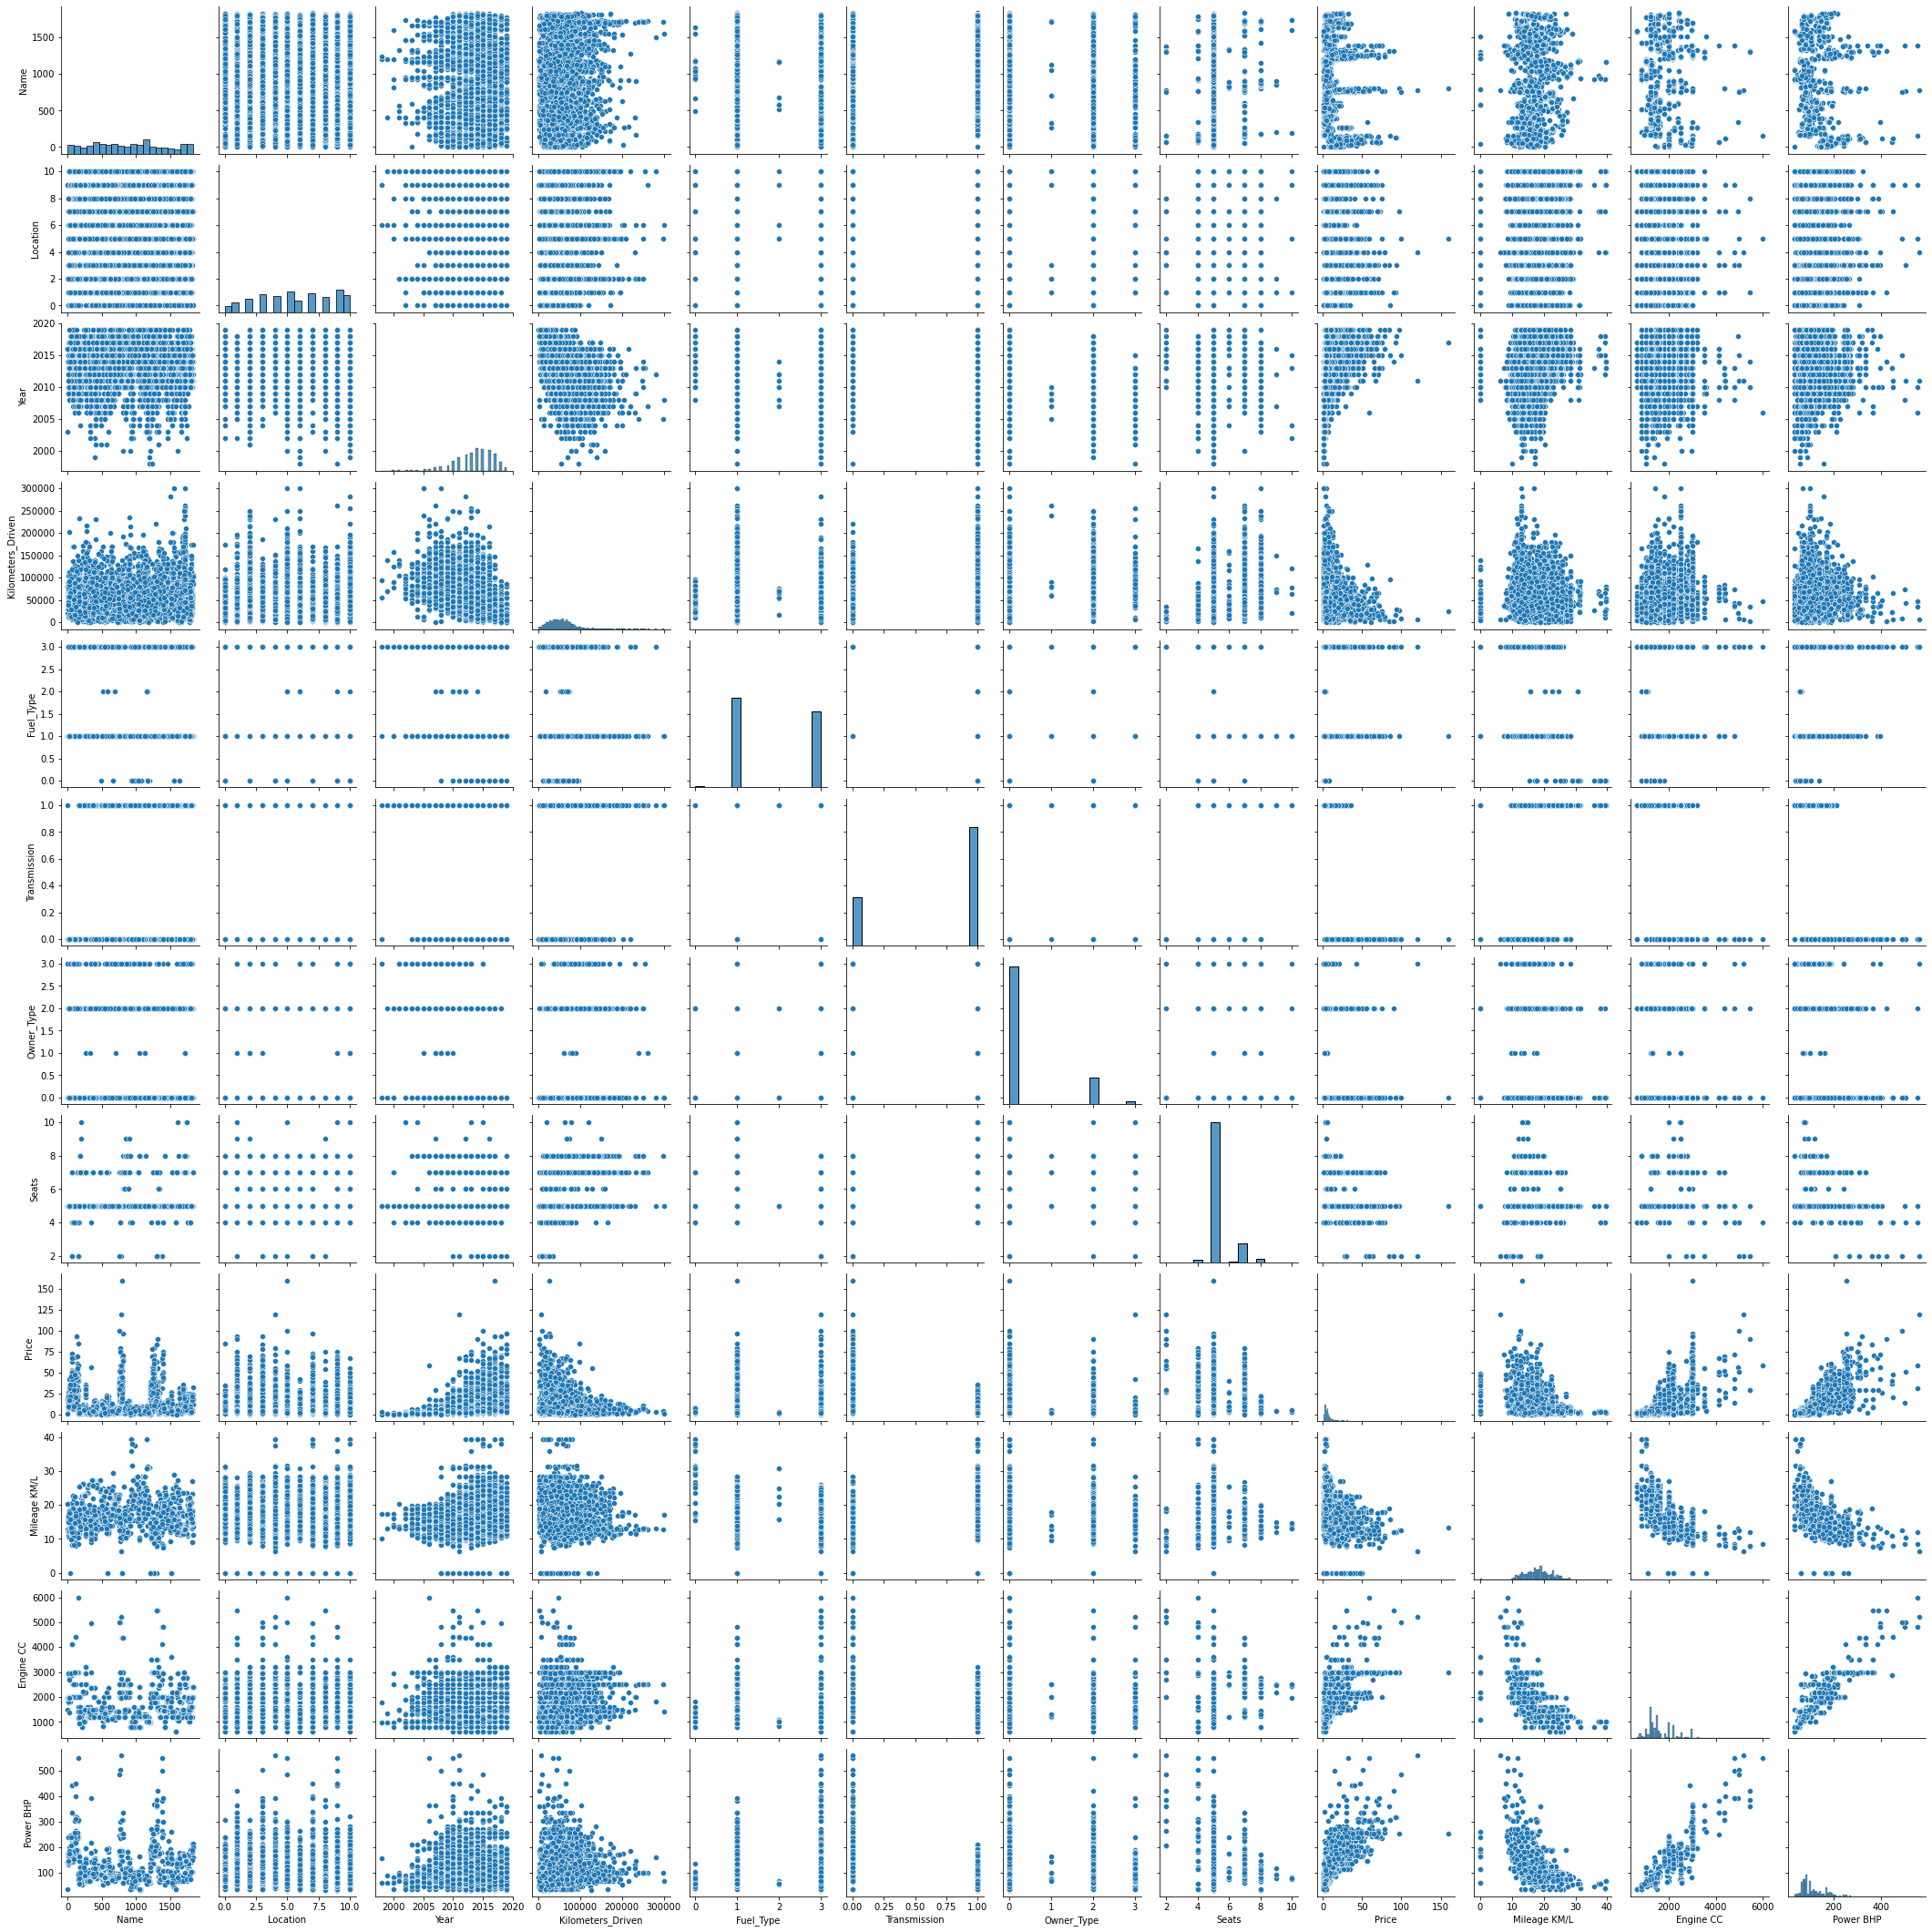

In [13]:
#cheching relations between features

sns.pairplot(df)

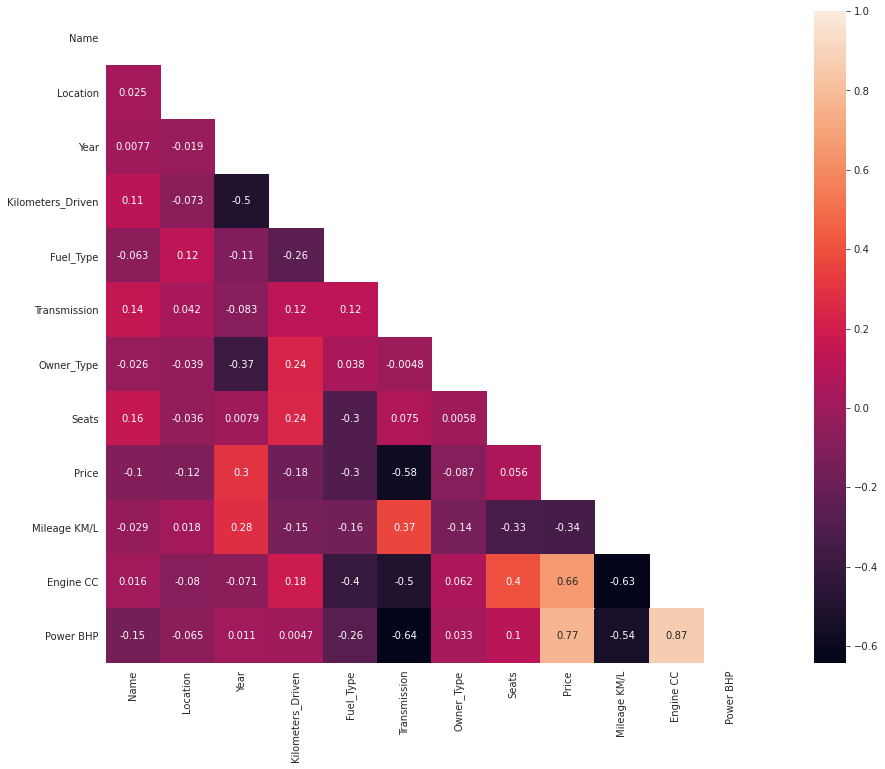

In [14]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, annot=True)

In [15]:
#pair plot and heatmap shows that Name, Location, Owner_Type and Seats are correlated with price
#dropping low correlated features

df.drop(['Name', 'Location', 'Owner_Type', 'Seats'],axis=1,inplace=True)

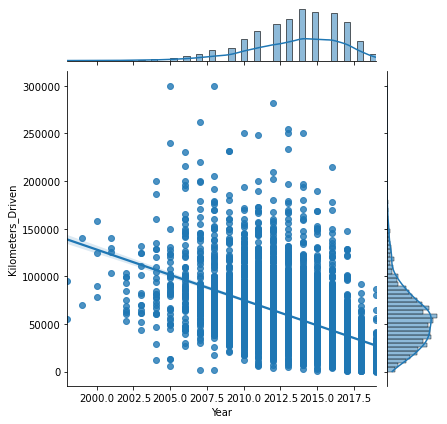

In [16]:
sns.jointplot(x='Year',y='Kilometers_Driven',data=df,kind='reg')

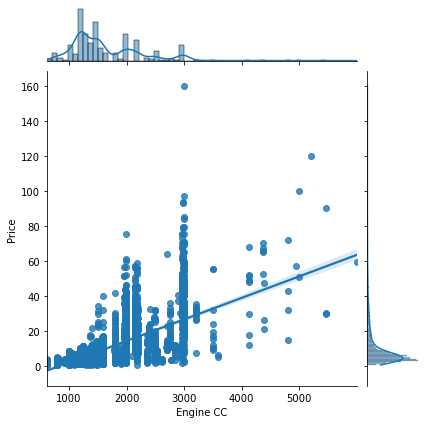

In [19]:
sns.jointplot(x='Engine CC',y='Price',data=df,kind='reg')